
# <font color=#770000>ICPE 639 Introduction to Machine Learning </font>

## ------ With Energy Applications

Some of the examples and exercises of this course are based on several books as well as open-access materials on machine learning, including [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


<p> &#169; 2021: Xiaoning Qian </p>

[Homepage](http://xqian37.github.io/)

**<font color=blue>[Note]</font>** This is currently a work in progress, will be updated as the material is tested in the class room.

All material open source under a Creative Commons license and free for use in non-commercial applications.

Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Perceptrons, Boosting, \& Artificial Neural Networks (ANNs)

<font color=red>need to work on this more!!! ANN, examples, etc... </font>

Here we cover some basics that may serve as the introduction to deep neural networks. This section will cover the content listed below: 

- [1 Perceptron](#1-Perceptron)
- [2 AdaBoost](#2-AdaBoost)
- [3 ANNs](#3-ANNs)
- [4 Hands-on Exercise](#4-Hands-on-Exercise)
- [Reference](#Reference) 



In [1]:
# required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image
from IPython.core.display import HTML
from sklearn.metrics import accuracy_score

import seaborn as sns
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## 1 Perceptron




### 1.1 Basics

Perceptrons are simply linear halfspaces for binary classification: 
$$sign(w^Tx),$$
where $w$ are model parameters (often including the intercept $b$ if needed to make explicit) to consider all features $x$ to predict class label $y\in\{-1, 1\}$. 

The intuition is that if all the data points are predicted correctly, then we have $y_n w^Tx_n \geq 0$. Hence, we can just construct the constrained optimization formulation to solve for $w$ under these constraints. Note that if we set the objective function to be $|w|^2$, it is similar as SVM. 

#### A simple example with a few lines of Python code

[reference link](https://github.com/MaviccPRP/perceptron/blob/master/perceptron.ipynb)

In [2]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))  # initialize to 0's
    eta = 1                  # learning rate
    epochs = 20              # number of iterations

    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]            # update if not correctly classified

    return w

w = perceptron_sgd(X,y)
print(w)

[ 2.  3. 13.]


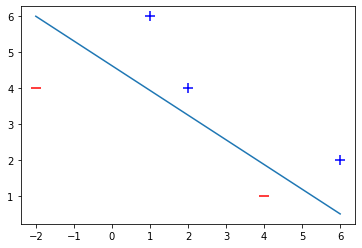

In [3]:
# visualize 
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, c="r",marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, c="b", marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

[ 2.  3. 13.]


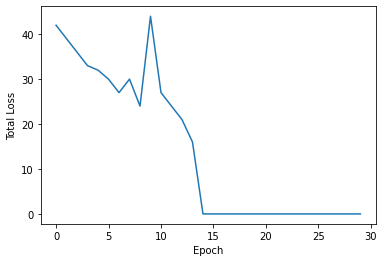

In [4]:
# visualize the training procedure
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w


print(perceptron_sgd_plot(X,y))

### 1.2 Perceptron Algorithm

As shown in the previous example, here is the summary of the algorithm: 

  1. Initialize $w$ (often set it to all zero).
  2. Update: $w \leftarrow w + \eta y_n x_n$ if $x_n$ is predicted wrong, where $\eta$ is the learning rate. 

Note that this is an **online** learning algorithm. One important theoretical results is that if the training set is linearly separable, the perceptron algorithm converges in a finite number of iterations.  

One possible derivation is to consider the *hinge loss* of misclassification: 
$$ l(y_n, x_n; w) = (- y_n w^T x_n)_+ $$
As we are minimizing the loss, we would update by **gradient descent**: 
$$ w \leftarrow w - \eta \nabla_w l(y_n, x_n; w), $$
where if we have straight-through simplification for computing the hinge-loss gradient, we can have the updating rule: 
$$ w \leftarrow w + \eta y_n x_n, \mbox{ if wrong prediction}. $$

**<font color=blue>[Note]</font>** Compare with the updating equation for deriving **logistic regression (LR)** (Note the different outspace: Here, $y\in\{-1, 1\}$; while in LR, $y\in\{0, 1\}$. 

In [5]:
from sklearn.linear_model import Perceptron

clf = Perceptron(fit_intercept=False, random_state=2)#(tol=1e-5, fit_intercept=False)#, random_state=0)
# Not sure why the results change for different random_state as supposed to converge easily in this case...

clf.fit(X, y)
Perceptron()

clf.score(X, y)

print(clf.coef_)

print(X)

print(clf.predict(X))
print(y)


[[ 2.  3. 13.]]
[[-2  4 -1]
 [ 4  1 -1]
 [ 1  6 -1]
 [ 2  4 -1]
 [ 6  2 -1]]
[-1 -1  1  1  1]
[-1 -1  1  1  1]



### 1.3 An Application 

#### Background
* `Heart` dataset contains a binary outcome `HD` for 303 patients who presented with chest pain. An outcome value of `Yes` indicates the presence of hear disease based on an angiographic test, while `No` means no heart disease. 

* There are 13 predictors including `Age`, `Sex`, `Chol` (a cholesterol measurement), `Thal`( Thallium stress test) and other heart and lung function measurements. 


In [6]:
Heart = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
Heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [8]:
Heart.ChestPain = pd.factorize(Heart.ChestPain)[0]
Heart.Thal = pd.factorize(Heart.Thal)[0]
X2 = Heart.drop('AHD', axis=1) # explanatory variables
y2 = pd.factorize(Heart.AHD)[0] # response variables AHD

In [11]:
clf = Perceptron(fit_intercept=False, random_state=2)
clf.fit(X2,y2)
clf.score(X2,y2)

0.6666666666666666

## 2 AdaBoost

**Reminder** Ensemble learning: Ensemble learning methods are meta-algorithms that combine several *weak* learners (homogenous or heterogeneous) into a single predictive model to improve prediction performance. Ensemble methods can decrease variance using bagging, reduce bias by boosting, or improve predictions using stacking.



**<font color=blue>[Note]</font>** **Boosting**, **bagging**, and **stacking**

* *Boosting*: an ensemble method for improving the model predictions. The idea is to train weak learners sequentially, each trying to correct its predecessor. When an input is misclassified, its contribution to the training loss is increased so that it's more likely to be classified correctly. Models in boosting are related to the previous derived models. 
* *Bagging*: (Bootstrap Aggregating) a machine learning ensemble strategy to improve performance, which uses bootstrap to get samples from the original training data, builds the models on each sampled dataset, and aggregates the results of all the models. Bagging can be parallelized as models are trained by different bootstrapped samples. 
* *Stacking*: a strategy that combines multiple base models' predictions into a new data set, which serves as the input data for another model to predict. (similar as deep network architectures)




In [ ]:
Image(url= "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_2_pu8tu6.png")



### 2.1 Algorithm


Take classification to illustrate the algorithmic procedure for AdaBoost (Adaptive Boosting). 

1. Initially, AdaBoost selects a training subset randomly.
2. It iteratively trains the weak learner $h_t$ by selecting the training set based on the accurate prediction of the last training.
3. It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight: 
$$ \alpha_t = \frac{1}{2}\ln{(\frac{1}{\epsilon_t}-1)},$$
where $\epsilon_t = \sum_n \rho_n^t \mathbb{1}(y_n \neq h_t(x_n))$ denotes the weighted training classification error. 
4. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification: 
$$ \rho^{t+1}_n = \frac{\rho^{t}_n e^{-y_n \alpha_t h_t(x_n)}}{\sum_i \rho^{t}_i e^{-y_i \alpha_t h_t(x_i)}}. $$
5. This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
6. Output the final prediction $f(x_n) = \sum_t \alpha_t h_t(x_n)$. 


In [ ]:
Image(url= "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_3_nwa5zf.png")

### 2.2 AdaBoost with the `Heart` dataset



In [15]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf.fit(X2,y2)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [16]:
clf.score(X2,y2) #Return the mean accuracy on the given data and labels.

0.9259259259259259

In [17]:
# Create adaboost classifer object with Perceptron
abc = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', base_estimator=Perceptron(), learning_rate=1) #algorithm='SAMME.R', 
abc.fit(X2,y2)
abc.score(X2,y2)


0.6734006734006734

In [ ]:
from sklearn import datasets

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', base_estimator=Perceptron(), learning_rate=1) #algorithm='SAMME.R', 

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [ ]:
# Create Perceptron classifer object
clf = Perceptron(tol=1e-3, random_state=0)

# Train Perceptron Classifer
model = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556



### 2.3 Math derivations

We will just make hand-waving explanation here: If we have seens that AdaBoost assumes the prediction model: 
$$f(x) = \sum_t \alpha_t h_t(x),$$
and for each iteration, the model updates: 
$$f_{t}(x) = f_{t-1}(x) + \alpha_t h_t(x), $$
the model training is to minimize the training loss with the exponential loss function (upperbounding the zero-one loss): 
$$ \min_{\alpha, h}\sum_n e^{-y_n f_t(x_n)}.  $$

The choice of the expential loss also provides the theoretical proof that AdaBoost will achieve infinitely small empricial risk asymptotically. Another interesting results is that AdaBoost somehow is immune to overfitting. 

## 3 ANNs



### 3.1 Basics

We have introduced the perceptron algorithm, which is the basic unit for most of the artificial neural networks, including many popular deep network models. Here we focus on the **multilayer perceptron (MLP)**. MLP is a feed-forward ANN model that maps sets of input data onto a set of appropriate outputs. MLP often consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. There can be one or more non-linear hidden layers between the input and the output layer. The training is through backpropagation (chain rule to compute gradients for involved network parameters) based on the corresponding loss function(s). 

MLP can be mathematically represented as: 
$$ h^l = g (W^l h^{l-1}), $$
where $W^l$ denotes the weighting parameters at the $l$th layer and $g(\cdot)$ is the activation function. The hidden variables $h^l$ can be considered as the output for each hidden layer, taking the previous layer's output $h^{l-1}$ as the input. $h^0 = X$ as the input feature vector and the output of the output layer is often used to predict the outcome of interest: 
$$\sum_i W^{L}_i h^{L-1}_i \rightarrow \hat{y}$$ for regression or 
$$\sigma(\sum_i W^{L}_i h^{L-1}_i) \rightarrow \hat{y}$$ for classification. 

**<font color=blue>[Note]</font>** All the deep network architectures, convolutional NNs (CNNs), recurrent NNs (RNNs), and graph NNs (GNNs) can all be considered as more "structured" neural networks, customized to the input feature relationships. 

### 3.2 Backpropagation

Essentially, training neural networks is mostly based on (stochastic) gradient descent algorithms. Recently, there have also been high-order methods. 

Similar as training perceptrons, the solution of the network parameters $W^l$'s can be solved by (error) **backpropagation** with gradients of the corresponding loss functions: 
$$\mathcal{L}(\hat{y}, y; X, W^l),$$
where $\nabla_{W^l} \mathcal{L}$ is always computed from the last layer to the input layer through the chain rule with the hidden variables $h^l$. Note that the updating $W^L$ is easy (We have covered it in linear regression or logistic regression).  $\nabla_{h^{L-1}} \mathcal{L}$ can also be computed easily.  

Let's first denote $z^l = W^{l}h^{l-1}$ and $h^{l} = g(z^l)$ as defined above in MLP, we can write $\nabla_{W^l}\mathcal{L} = \nabla_{z^l}\mathcal{L} \nabla_{W^l} z^l = \nabla_{z^l}\mathcal{L} \bigodot h^{l-1}$ by the chain rule. Note that $\nabla_{z^l}\mathcal{L}$ is easy to compute by backpropagation: 
$$\nabla_{z^l}\mathcal{L} = \nabla_{h^{l}}\mathcal{L}\nabla_{z^l} h^{l} = \nabla_{h^{l}}\mathcal{L} \bigodot g'(z^{l}),$$
where $g'(\cdot)$ is the derivative of the activation function. Note that 
$$\nabla_{h^{l}}\mathcal{L} = \nabla_{z^{l+1}}\mathcal{L} \nabla_{h^{l}} z^{l+1} = \nabla_{z^{l+1}}\mathcal{L} W^{l+1}$$
and $W^{l+1}$ has been updated at the layer $l+1$ and $\nabla_{z^{l+1}}\mathcal{L}$ can be again backpropagated from the layer $l+2$. Therefore, 
$$\nabla_{W^l }\mathcal{L} = \nabla_{z^{l+1}}\mathcal{L} W^{l+1}  \bigodot g'(z^{l})\bigodot h^{l-1}.$$


In [ ]:
Image(url= "https://www.python-course.eu/images/mlp_example_layer_800w.webp", width=500)

### 3.3 A naive example

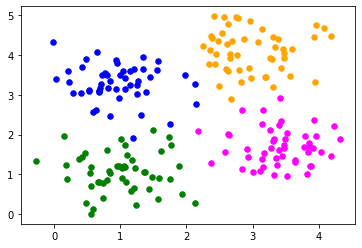

In [55]:
# simulated data in two-dimensional space
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=30, 
               label=str(n_class))
    

datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [56]:

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)

clf.fit(train_data, train_labels)     

clf.score(train_data, train_labels)

0.99375

In [57]:
predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on train data: ", test_score)

predictions_train[:20]

score on train data:  0.99375
score on train data:  0.975


array([1, 2, 0, 0, 0, 0, 2, 3, 3, 0, 1, 0, 0, 3, 3, 3, 0, 2, 0, 0])

In [58]:
## A really naive example

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [59]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


## 4 Hands on exercise: Iris data 

In [74]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
iris_data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

cmap_light = ListedColormap(['orange', 'azure', 'green'])
cmap_bold = ['darkorange', 'darkblue', 'darkgreen']

weights='uniform'

# we create an instance of Perceptron to fit the data: 

# Create Perceptron classifer object
clf = Perceptron(tol=1e-8, random_state=0)

# Train Perceptron Classifer
model = clf.fit(X_train, y_train)

clf.score(X_test,y_test)
  

0.6444444444444445

In [76]:
# Create adaboost classifer object
abp = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', base_estimator=Perceptron(), learning_rate=1) #algorithm='SAMME.R', 

# Train Adaboost Classifer
model = abp.fit(X_train, y_train)

abp.score(X_test,y_test)

0.8444444444444444

In [77]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [78]:
# Create MLP

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 12), random_state=1)

model = mlp.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


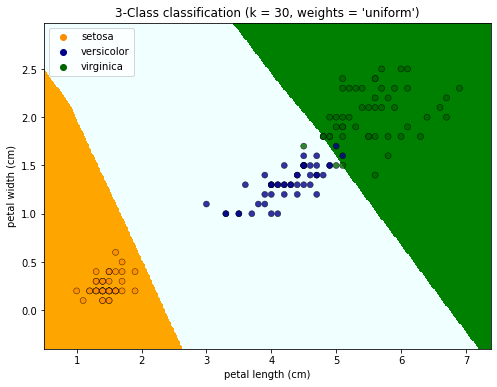

In [80]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min - 0.5, x_max + 0.5]x[y_min - 0.5, y_max + 0.5].
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, h), np.arange(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap = cmap_light)

# Plot also the training points
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = iris.target_names[y], palette = cmap_bold, alpha = 0.8, edgecolor = "black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()

## Reference 
* [Perceptron](https://en.wikipedia.org/wiki/Perceptron)
* [A quick guide to boosting in Machine Learning](https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5)
* [AdaBoost from DataCamp](https://www.datacamp.com/community/tutorials/adaboost-classifier-python)
* [A Primer to Ensemble Learning – Bagging and Boosting](https://analyticsindiamag.com/primer-ensemble-learning-bagging-boosting/)
* [ANNs with scikitlearn](https://www.python-course.eu/neural_networks_with_scikit.php)

# Questions? 

In [ ]:
Image(url= "https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png", width=100)
